# Experiments

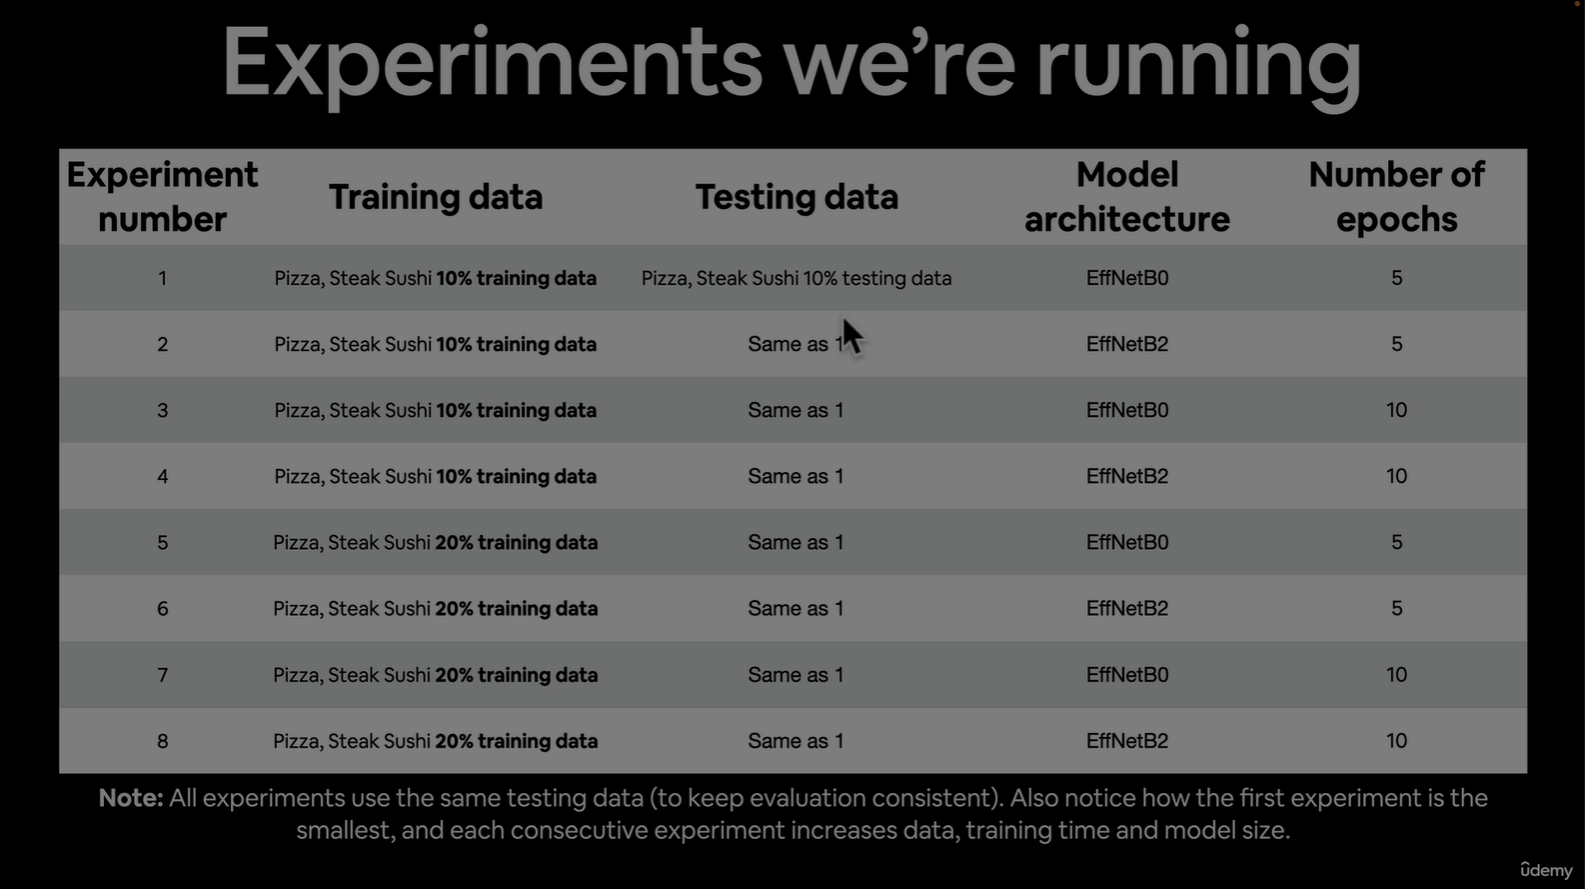

In [14]:
import torch 
import torch.nn as nn
import torchvision.transforms as trans
import torchvision
from ModularTorch.DataSetup import get_data_loaders, get_data

In [2]:
data_10_percent = get_data(data_link = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           name = "food_3_labels_10_percent")

data_20_percent = get_data(data_link = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                           name = "food_3_labels_20_percent")

[INFO] Data will be saved at 'data\food_3_labels_10_percent'
[INFO] Data downloaded
[INFO] Unzipping 'food_3_labels_10_percent' data
[SUCCESS] Done
[INFO] Data will be saved at 'data\food_3_labels_20_percent'
[INFO] Data downloaded
[INFO] Unzipping 'food_3_labels_20_percent' data
[SUCCESS] Done


In [11]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
LR = 0.001

In [12]:
train_transform = trans.Compose([
    trans.Resize(size = IMAGE_SIZE), 
    trans.ToTensor(),
    trans.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [13]:
train_loader_10_percent, test_loader_10_percent, class_names_10_percent = get_data_loaders(data_10_percent/"train", data_10_percent/"test", train_transform, train_transform)
train_loader_20_percent, test_loader_20_percent, class_names_20_percent = get_data_loaders(data_20_percent/"train", data_20_percent/"test", train_transform, train_transform)

In [17]:
def get_effnet_b0(out_features):
    eff_net_b0_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    eff_net = torchvision.models.efficientnet_b0(weights = eff_net_b0_weights)

    # freezing weights
    for param in eff_net.features.parameters():
        param.requires_grad = False
    
    # custom head
    eff_net.classifier = nn.Sequential(
        nn.Dropout(p = 0.2, inplace = True),
        nn.Linear(in_features = 1280, out_features = out_features, bias = True)
    )

    return eff_net



def get_effnet_b2(out_features):
    eff_net_b2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    eff_net = torchvision.models.efficientnet_b2(weights = eff_net_b2_weights)

    # freezing weights
    for param in eff_net.features.parameters():
        param.requires_grad = False
    
    # custom head
    eff_net.classifier = nn.Sequential(
        nn.Dropout(p = 0.3, inplace = True),
        nn.Linear(in_features = 1408, out_features = out_features, bias = True)
    )

    return eff_net

In [18]:
eff_net_b0 = get_effnet_b0(len(class_names_10_percent))
eff_net_b2 = get_effnet_b2(len(class_names_10_percent))

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-bcdf34b7.pth" to C:\Users\sirre/.cache\torch\hub\checkpoints\efficientnet_b2_rwightman-bcdf34b7.pth
100%|██████████| 35.2M/35.2M [00:07<00:00, 5.12MB/s]
